In [1]:
import numpy as np; np.set_printoptions(suppress=True, linewidth=180)
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

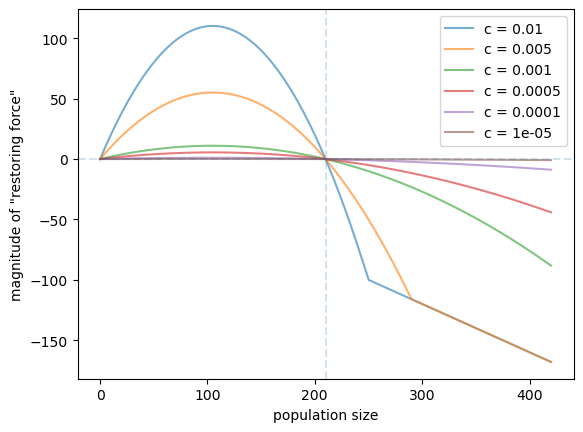

378.0
336.0
336.0
336.0
336.0
336.0


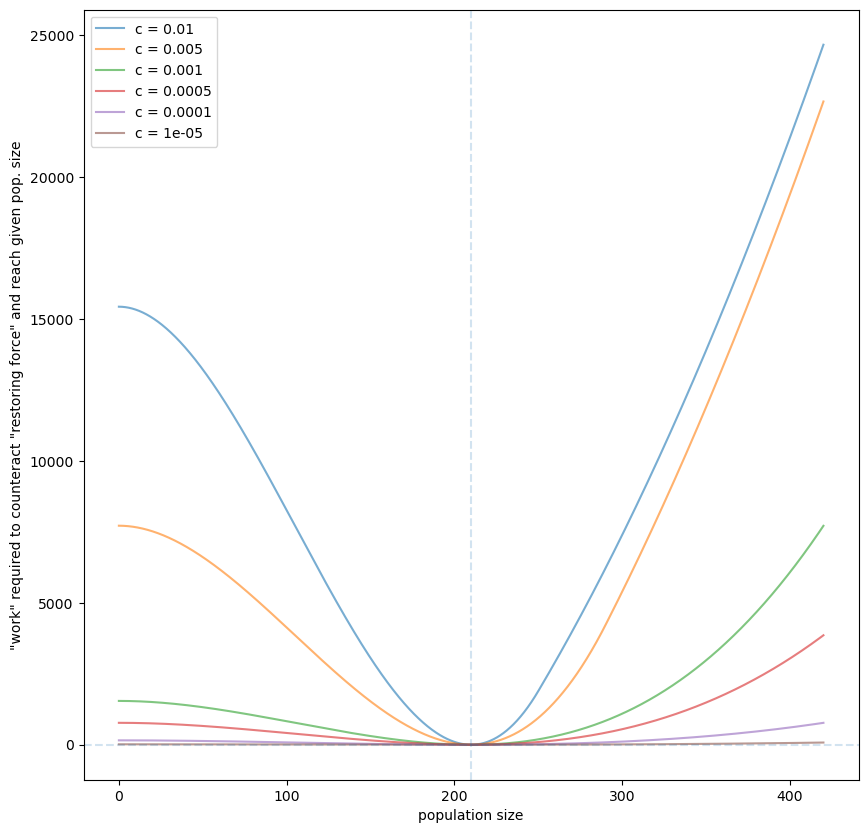

In [2]:
NSS = 210
B = 0.4
D = 0.4


def return_strength(pop, c):
    return (pop*(max(0, B+(c*(NSS-pop)))-D))

C_val = sequence = [round(i * 10**-decimals, 14) for decimals in range(3, 5) for i in range(10, 0, -1)]
C_val = [element for i, element in enumerate(C_val) if i % 5 == 0] # sparseify for testing
C_val.append(0.0001)
C_val.append(0.00001)
#C_val.append(0.5)

pop_val = np.linspace(0, 420, 10001)


for C in C_val:
    net_change = np.array([return_strength(pop, C) for pop in pop_val])
    #plt.plot(pop_val, np.abs(net_change), label = f'c = {C}', alpha = 0.6)
    plt.plot(pop_val, net_change, label = f'c = {C}', alpha = 0.6)

plt.axhline(0, alpha = 0.2, linestyle = 'dashed')
plt.axvline(NSS, alpha = 0.2, linestyle = 'dashed')
plt.xlabel('population size')
plt.ylabel('magnitude of "restoring force"')
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


pop_val = np.linspace(0, 420, 10001)
center_i = np.where(pop_val == NSS)[0][0]
for C in C_val:
    abs_net_change = np.array([abs(return_strength(pop, C)) for pop in pop_val])
    positive_integral = [np.trapz(abs_net_change[center_i:i], pop_val[center_i:i]) for i in range(center_i, len(pop_val))]
    negative_integral = np.array([np.trapz(-abs_net_change[(center_i-i):center_i][::-1], pop_val[(center_i-i):center_i][::-1]) for i in range(0, center_i)])[::-1]
    integral = list(negative_integral)
    integral.extend(positive_integral)
    
    pos = 0
    for pot, pop in zip(integral, pop_val):
        if pot > integral[0] and pop %1 == 0:
            print(pop)
            break
    
    plt.plot(
        pop_val, 
        integral, 
        label = f'c = {C}', alpha = 0.6)

plt.axhline(0, alpha = 0.2, linestyle = 'dashed')
plt.axvline(NSS, alpha = 0.2, linestyle = 'dashed')
plt.xlabel('population size')
plt.ylabel('"work" required to counteract "restoring force" and reach given pop. size')
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
